# Breast Cancer Prediction using Logistic Regressions

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Loading Data

In [2]:
df = pd.read_csv('LogReg_Cancer.txt')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Data Cleanup and Encoding

In [3]:
df = df.drop(['id','Unnamed: 32'], axis = 1)

In [4]:
def encode(df):
    labelEnc = LabelEncoder()
    for c in df.columns:
        if df[c].dtypes == 'object':
            df[c] = labelEnc.fit_transform(df[c])
    return df


df1 = encode(df)
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


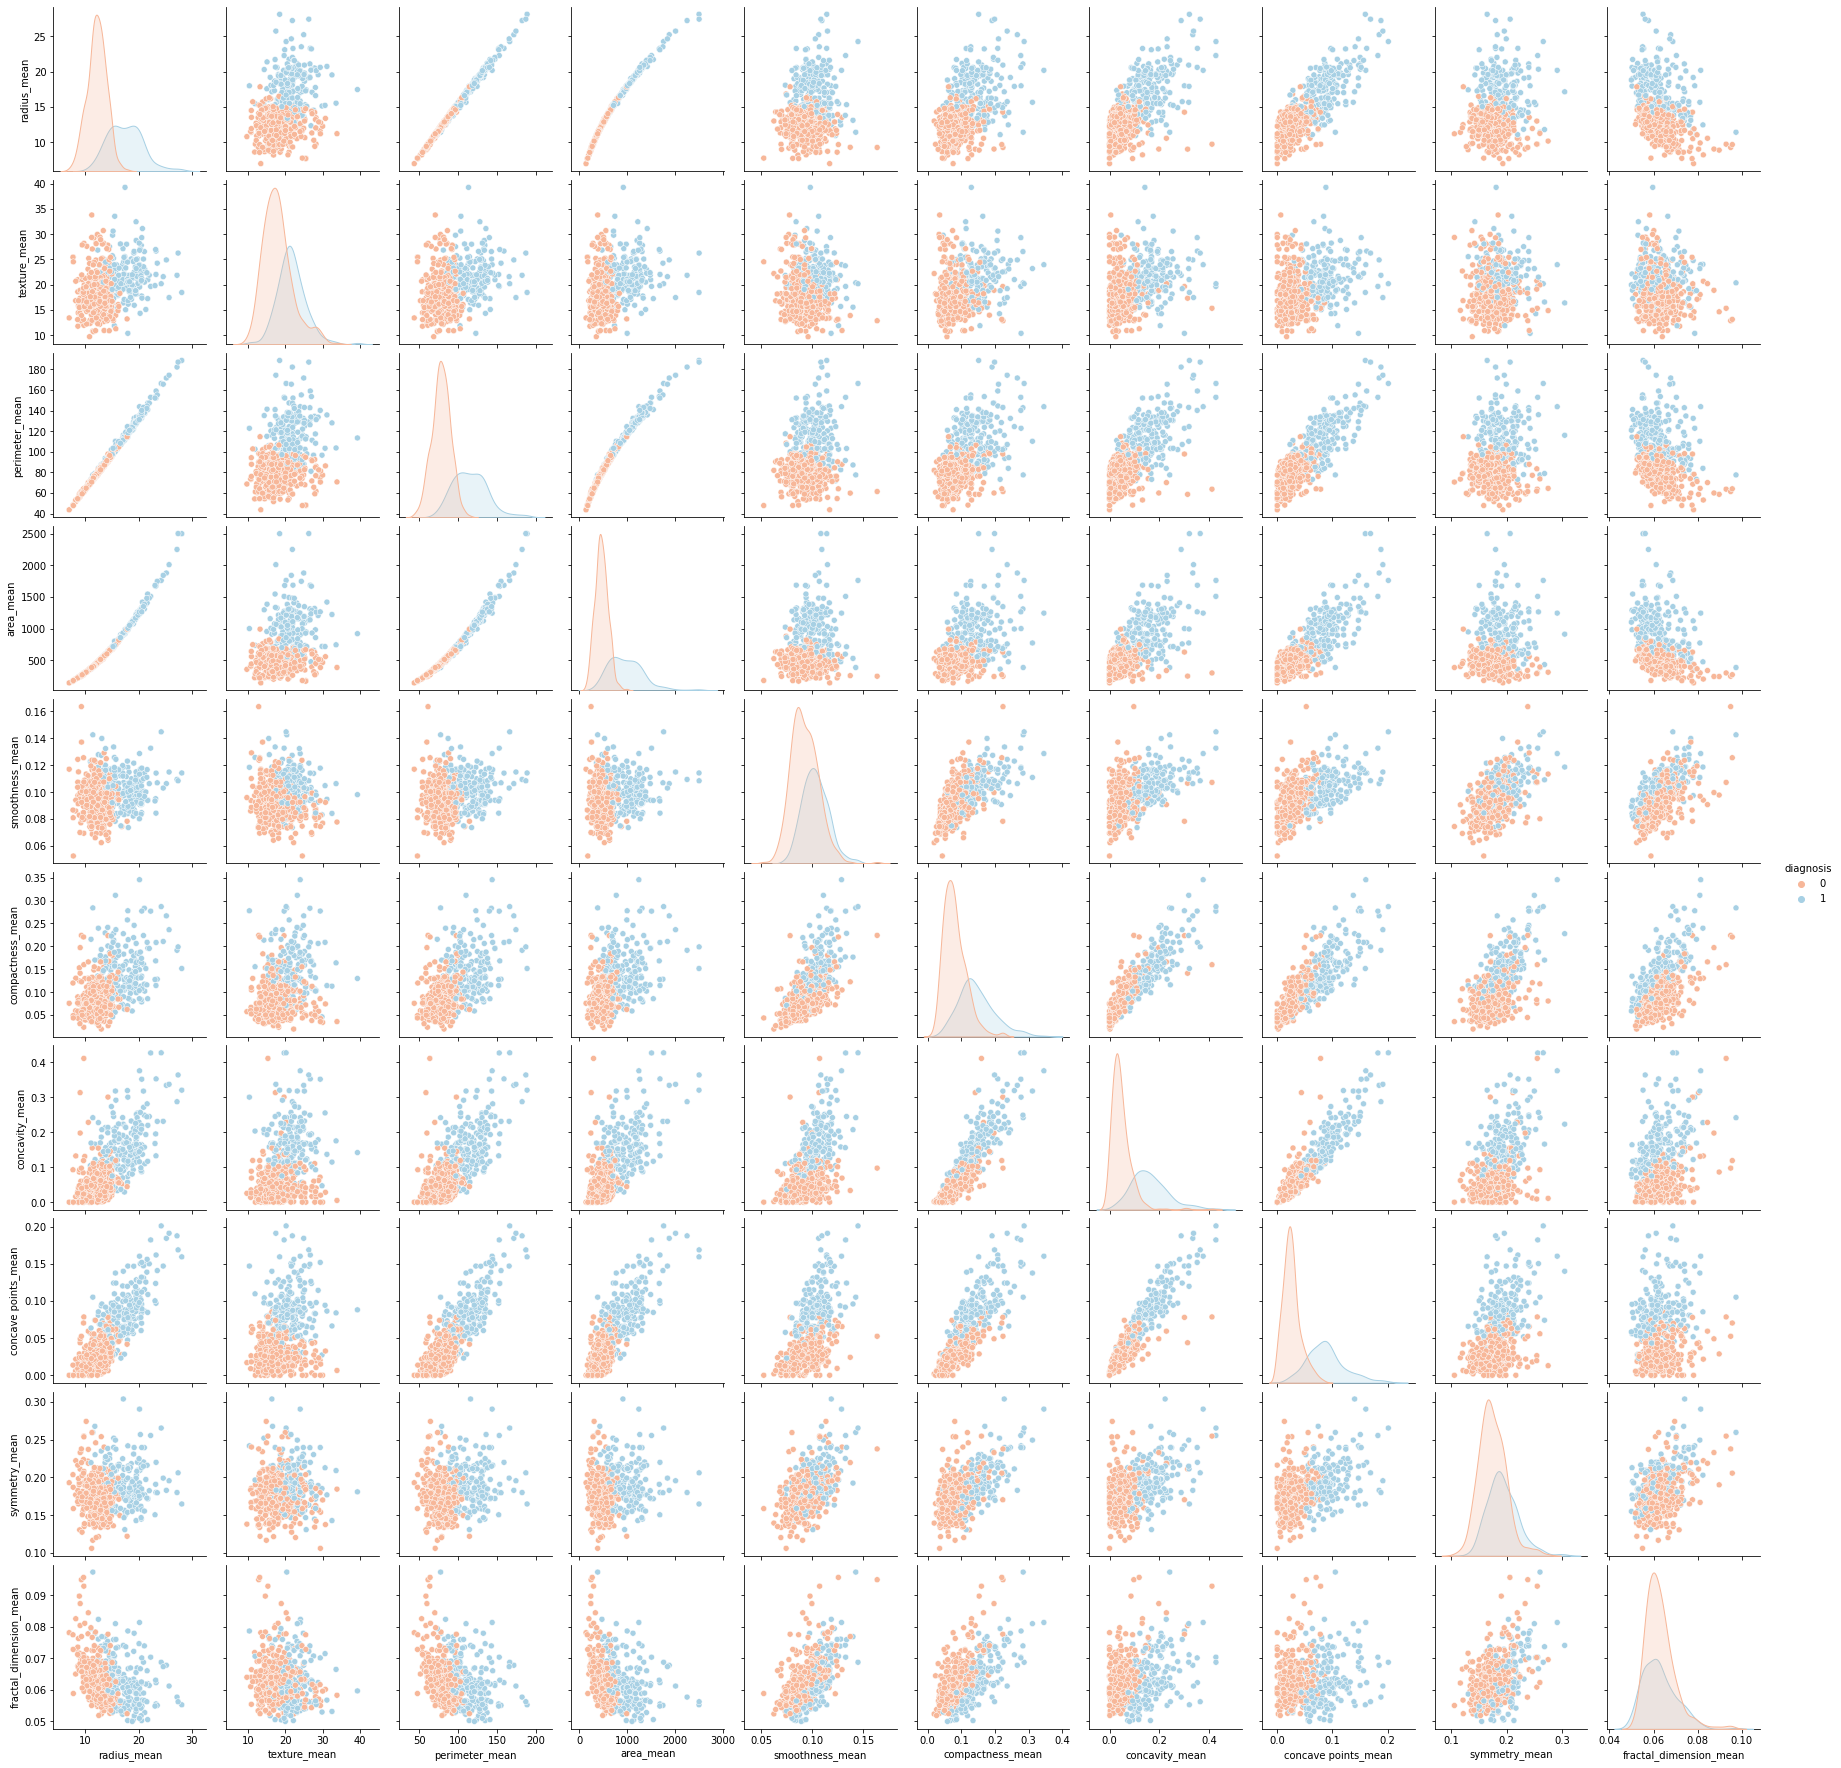

In [5]:
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

#### Feature Scaling and Splitting Data into Testing and Training

In [6]:
x = df1.drop('diagnosis', axis=1)
Y = df1['diagnosis']
sc = StandardScaler()
X = sc.fit_transform(x)
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [9]:
theta = np.zeros(X_train.shape[1])

In [10]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Building Model

#### Sigmoid Function

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### Cost Function

In [12]:
def costFunc(x, y, theta):
    z = sigmoid(np.dot(x, theta.T))
    p = -(np.array(y)*np.array(np.log(z)) + np.array(1-y)*np.array(np.log(1-z)))
    cost = p.mean()
    return cost

#### Gradient Descent

In [13]:
def gradDescent(x, y, theta, alpha):
    h = sigmoid(x.dot(theta.T))
    loss = h-y
    theta -= (alpha/(len(x))*(loss.T.dot(x)))
    return theta   

#### Logistic Regression Model

In [14]:
def model(x, y, theta, alpha, epoch):
    costHist = []
    for _ in range(epoch):
        theta = gradDescent(x, y, theta, alpha)
        if((_+1)%1000 == 0):
            loss = costFunc(x, y, theta)
            costHist.append(loss)
            print(f"Epoch: {_+1}, Cost: {loss}")
    return theta, costHist

##### Testing Gradient Descent

In [15]:
cost = costFunc(X_train, Y_train, theta)
print(cost)
theta = gradDescent(X_train, Y_train, theta, alpha = 0.05)
cost = costFunc(X_train, Y_train, theta)
print(cost)

0.6931471805599452
0.6028238411590506


#### Training the Model

In [16]:
theta, costList = model(X_train, Y_train, theta, alpha = 0.05, epoch = 10000)

Epoch: 1000, Cost: 0.0753033296757596
Epoch: 2000, Cost: 0.06693416362546464
Epoch: 3000, Cost: 0.0631900071513998
Epoch: 4000, Cost: 0.060992507953009825
Epoch: 5000, Cost: 0.05952812778295415
Epoch: 6000, Cost: 0.058466527510039265
Epoch: 7000, Cost: 0.05764517788285122
Epoch: 8000, Cost: 0.05697625123822493
Epoch: 9000, Cost: 0.05640959227032899
Epoch: 10000, Cost: 0.05591515284310626


#### Plotting Convergence

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Text(0, 0.5, 'Cost')

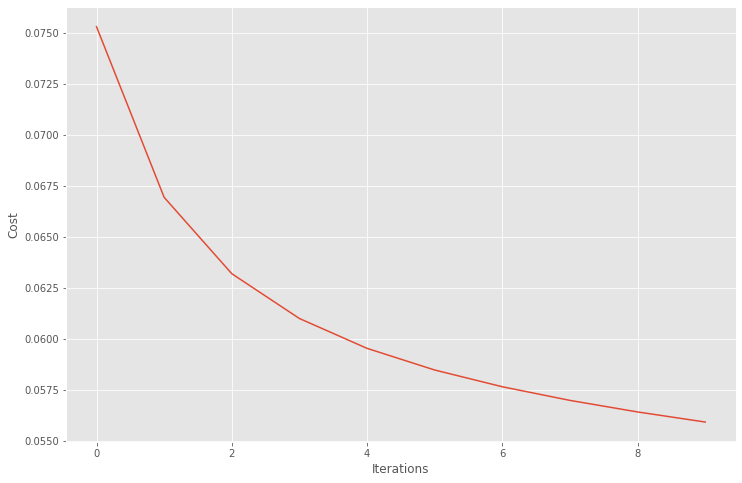

In [18]:
plt.plot(costList)
plt.xlabel("Iterations")
plt.ylabel("Cost")


#### Prediction and Accuracy

In [20]:
def predict(theta, X):
    y_ = []
    p = sigmoid(X.dot(theta))
    for _ in range(len(p)):
        if p[_] >= 0.5:
            y_.append(1)
        else:
            y_.append(0)
    return y_

In [21]:
y_pred = predict(theta, X_test)

In [22]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

r2(y_pred,Y_test)

0.9750292056074766